# ♦ Mercedes Benz - The Best or Nothing ♦

Github link : https://github.com/deadskull7/Mercedes-Benz-Challenge-78th-Place-Solution-Private-LB-0.55282-Top-2-Percent-

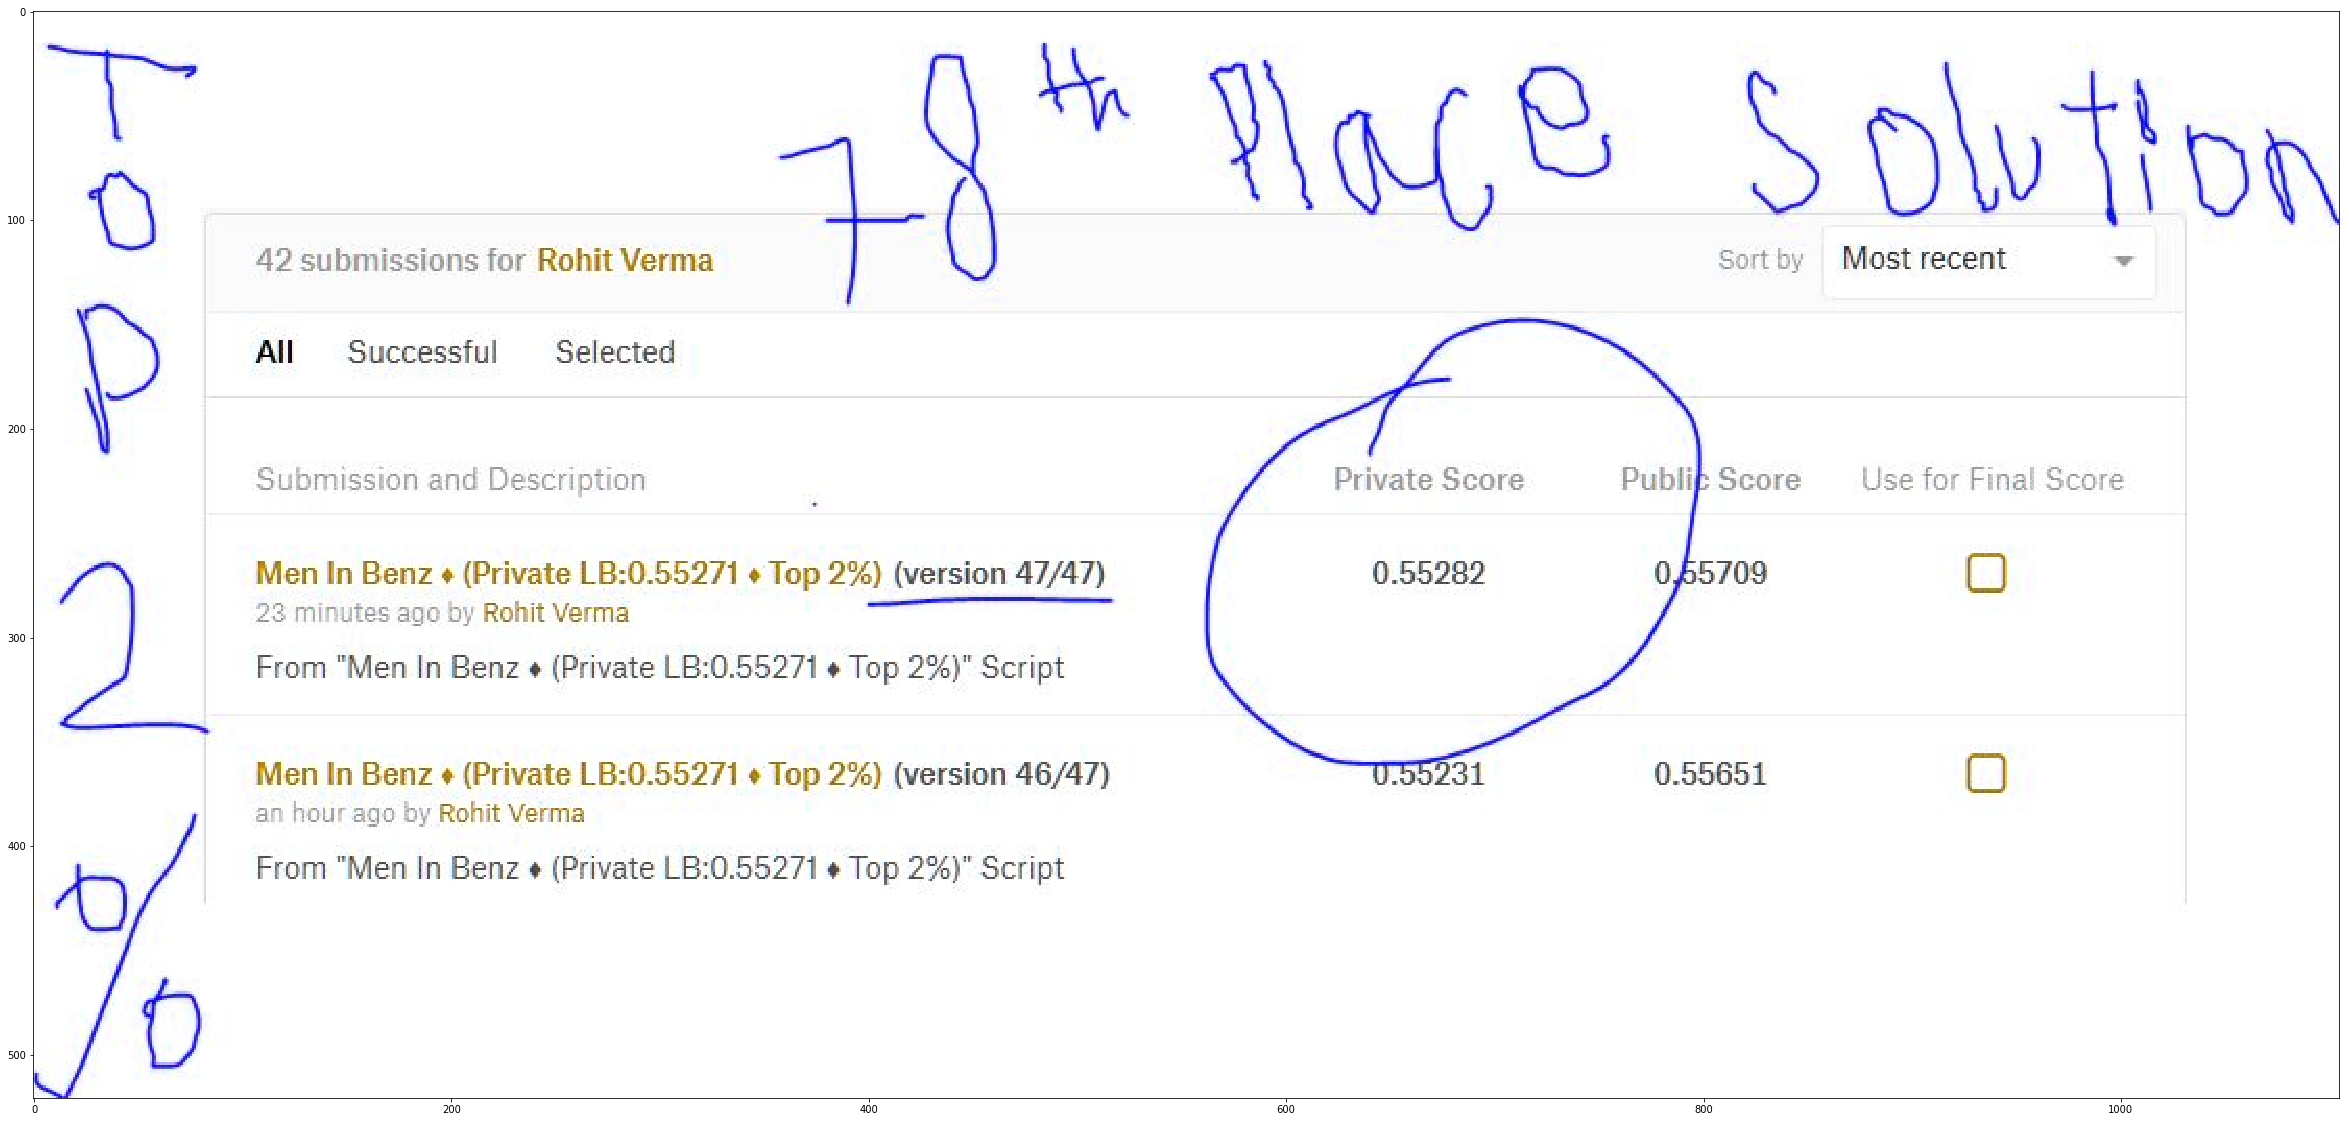

In [1]:
import matplotlib.pyplot as plt
import cv2
from pylab import rcParams

rcParams['figure.figsize'] = 50,20
img=cv2.imread("../input/private-score/score.JPG")
plt.imshow(img)

<img src="http://starchop.altervista.org/wp-content/uploads/2015/02/Mercedes-Benz-Logo-Rain-HD-Wallpaper.jpg"   />

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input/"))
import warnings
warnings.filterwarnings("ignore")

['mercedes-benz-greener-manufacturing', 'private-score']


In [3]:
train = pd.read_csv('../input/mercedes-benz-greener-manufacturing/train.csv')
test = pd.read_csv('../input/mercedes-benz-greener-manufacturing/test.csv')
df = train

In [4]:
print(train.shape)
train.head()

(4209, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0



**370 numerical features and 8 categorical features**

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)       #  numeric dataframe
objects = ['O']
df_cat = df.select_dtypes(include=objects)
print(df_num.shape,df_cat.shape)
print(df_cat.columns,'\n','--------------------------------------------------------------------------------','\n',df_num.columns)

(4209, 370) (4209, 8)
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object') 
 -------------------------------------------------------------------------------- 
 Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)


**Looking into each categorical feature **

In [6]:
for i in df_cat.columns:
    print('The unique values in '+i+' are: ',df[i].nunique(),'\n',df_cat[i].unique(),'\n',"--------------------------------------------------------------------------------")

The unique values in X0 are:  47 
 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab'] 
 --------------------------------------------------------------------------------
The unique values in X1 are:  27 
 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab'] 
 --------------------------------------------------------------------------------
The unique values in X2 are:  44 
 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar'] 
 --------------------------------------------------------------------------------
The unique values in X3 are:  7 
 ['a' 'e' 'c' 'f' 'd' 'b' 'g'] 
 ----------------------------------------------------

In [7]:
print(df.isnull().sum().sum(axis=0))

0


**A separate dataframe to study only categorical features and there mutual relationship and also the one with target column y.**

In [8]:
temp=df.y.values
df_cat['y']=temp
print(df_cat.head())

   X0 X1  X2 X3 X4 X5 X6 X8       y
0   k  v  at  a  d  u  j  o  130.81
1   k  t  av  e  d  y  l  o   88.53
2  az  w   n  c  d  x  j  x   76.26
3  az  t   n  f  d  x  l  e   80.62
4  az  v   n  f  d  h  d  n   78.02


### Outlier detection and removal .... A bit cleaning....

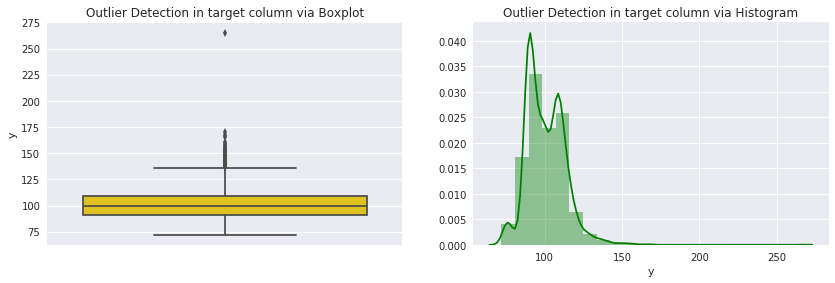

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(14,9)})
plt.subplot(221)
plt.title("Outlier Detection in target column via Boxplot")
plt.ylabel("Values of y")
plt.grid(True)
sns.boxplot(y=df["y"],color='gold')
plt.subplot(222)
plt.title("Outlier Detection in target column via Histogram")
plt.grid(True)
ax = sns.distplot(df.y,color='green',bins=22)
plt.show()

**This clearly shows the outliers are above a value of approx. 137.5. Well we will remove outliers after 150.**

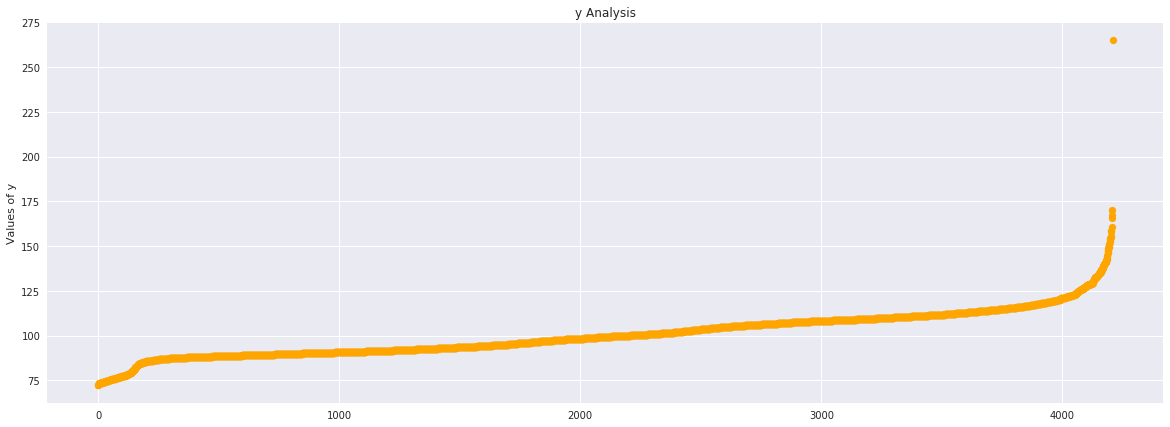

In [10]:
sns.set(rc={'figure.figsize':(20,7)})
plt.title("y Analysis")
plt.ylabel("Values of y")
plt.scatter(range(df.shape[0]),np.sort(df.y.values),color='orange')

**A very distinct and conspicuous point around 275 in boxplot and also the green area in histogram. This noise has to removed.**

In [11]:
print((df.loc[df.y>150,'y'].values))
df=df[df.y<150]
print("Removing outliers based on above information and setting 150 as a threshold value . . . . . . . . . . . . . . . . . . . . ")
print(df.shape)
df_cat=df_cat[df_cat.y<150]
df_num=df_num[df_num.y<150]

[150.43 169.91 154.87 265.32 158.53 154.43 160.87 150.89 152.32 167.45
 154.16 158.23 153.51 165.52 155.62]
Removing outliers based on above information and setting 150 as a threshold value . . . . . . . . . . . . . . . . . . . . 
(4194, 378)


**y wrt ID of dataframe.**

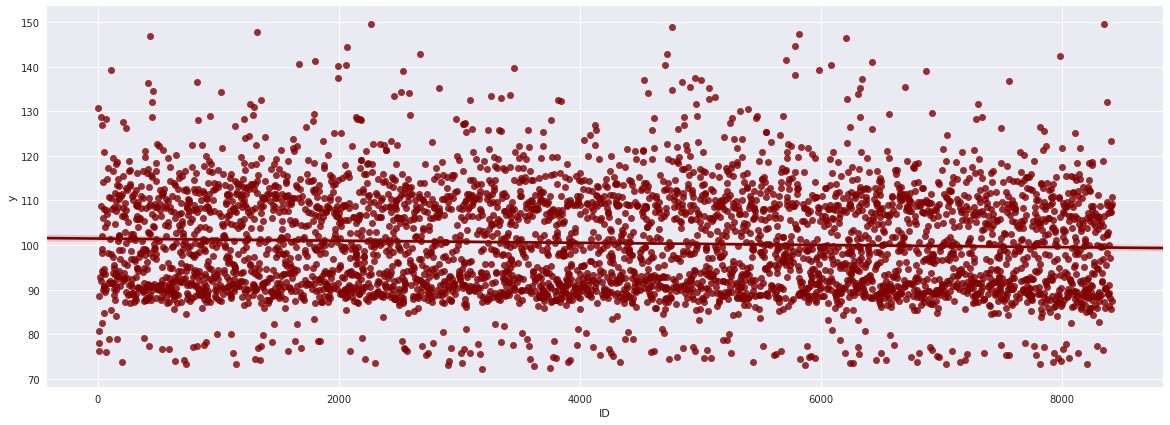

In [12]:
sns.set(rc={'figure.figsize':(20,7)})
sns.regplot(x='ID', y='y', data=df,color='maroon')

**This shows a very slight decreasing trend of y wrt ID , maybe cars later in series took less time in test bench. This gives ID an importance while estimating y.**

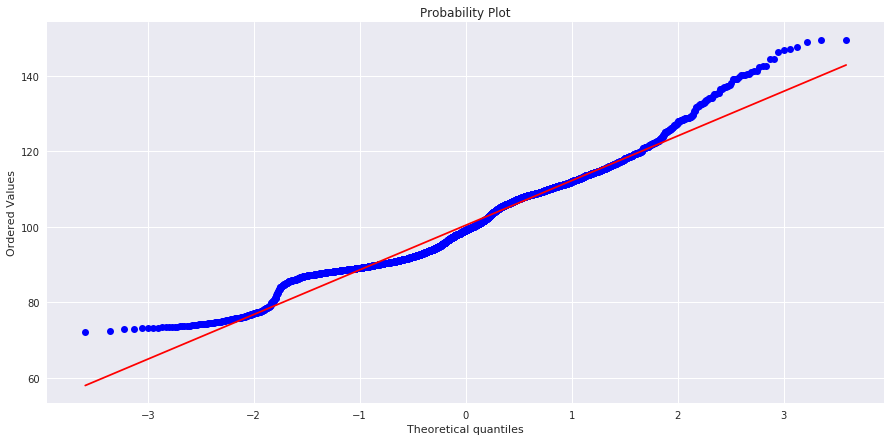

In [13]:
from scipy import stats
rcParams['figure.figsize'] = 15, 7
res = stats.probplot(df['y'], plot=plt)

The y values of the dataset appears to be skewed

Taking Log Transformation

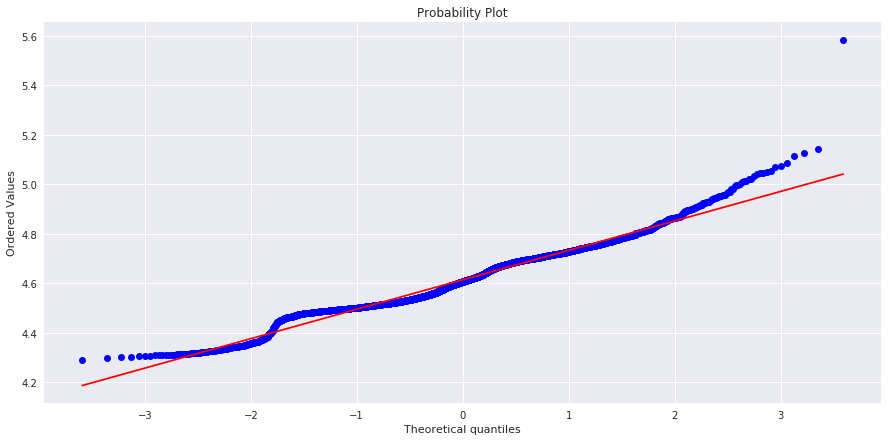

In [14]:
res = stats.probplot(np.log1p(train["y"]), plot=plt)


## Now lets see some jitter on boxplots . . .

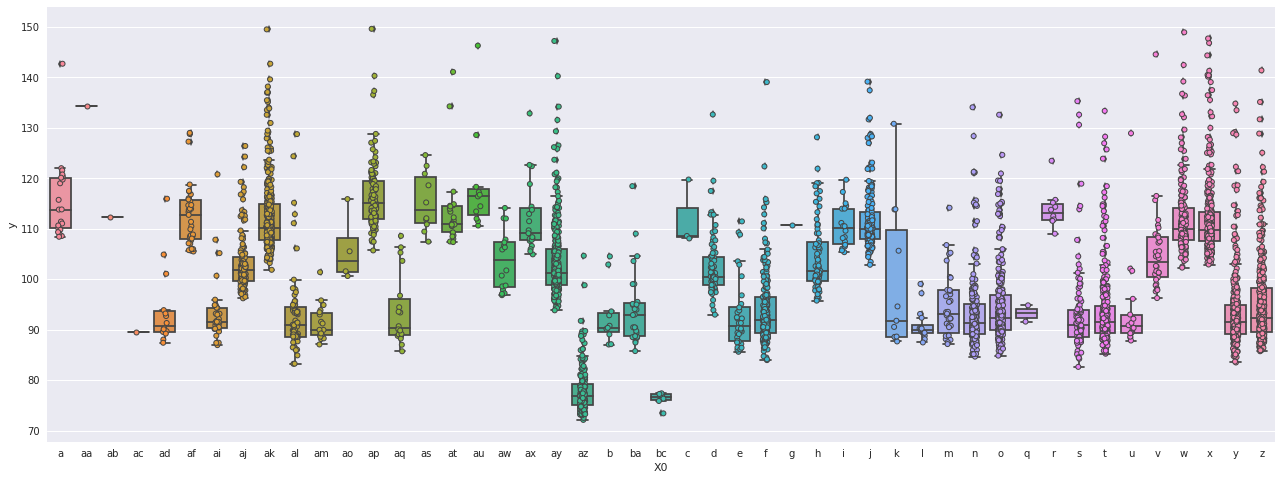

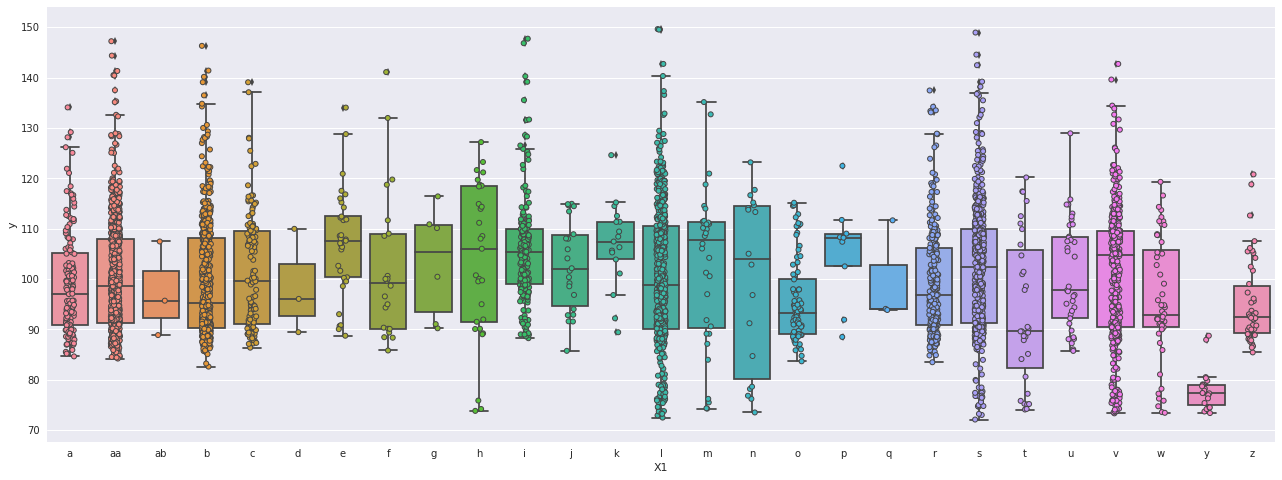

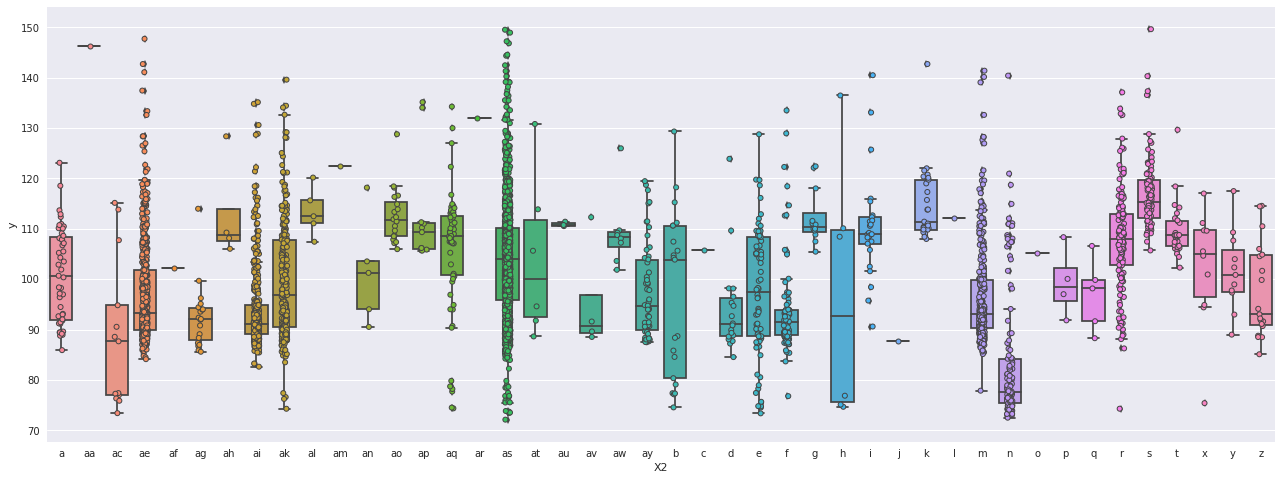

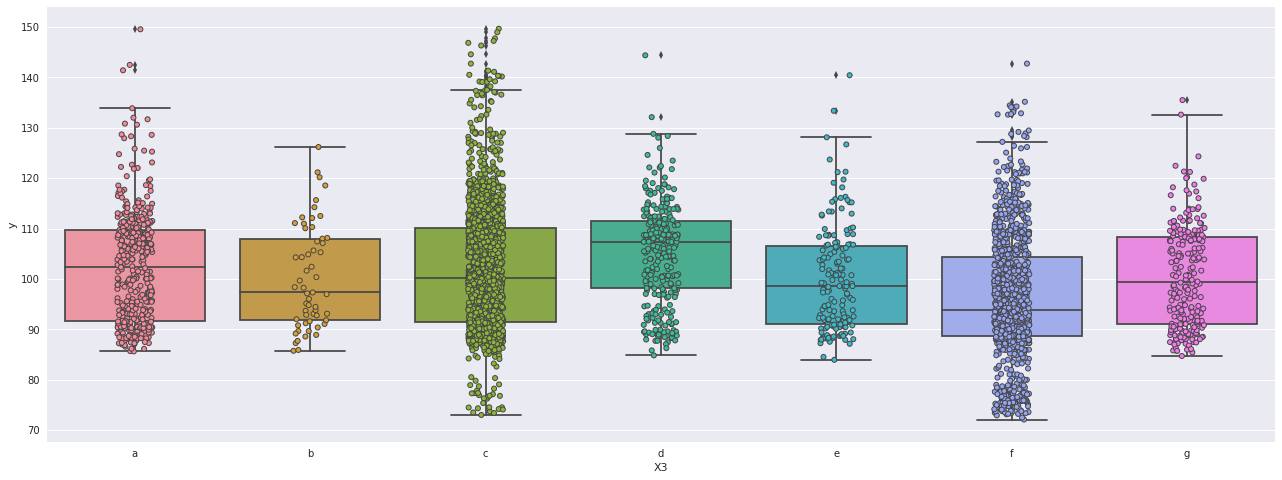

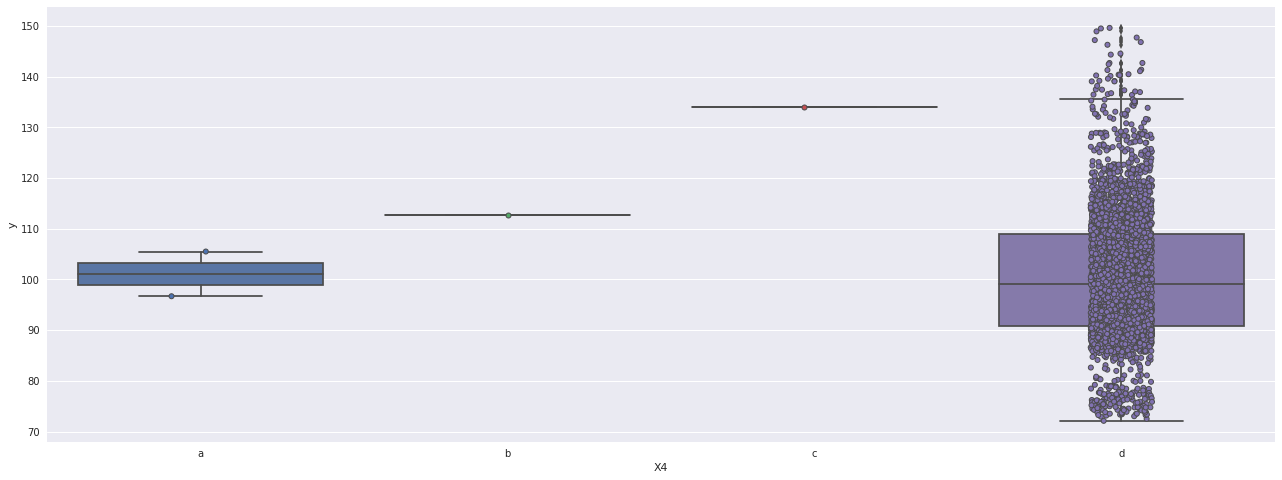

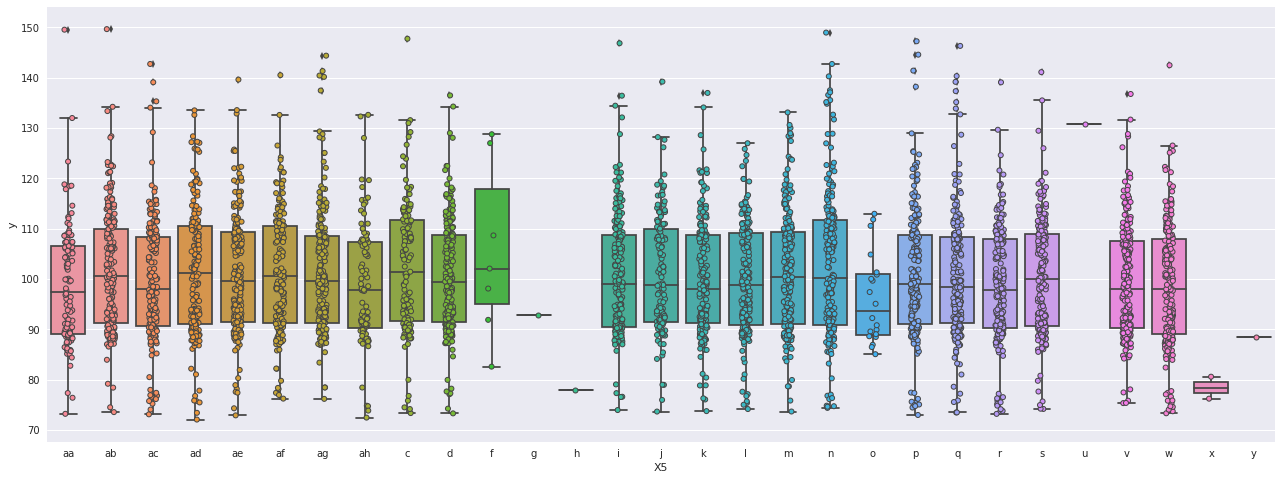

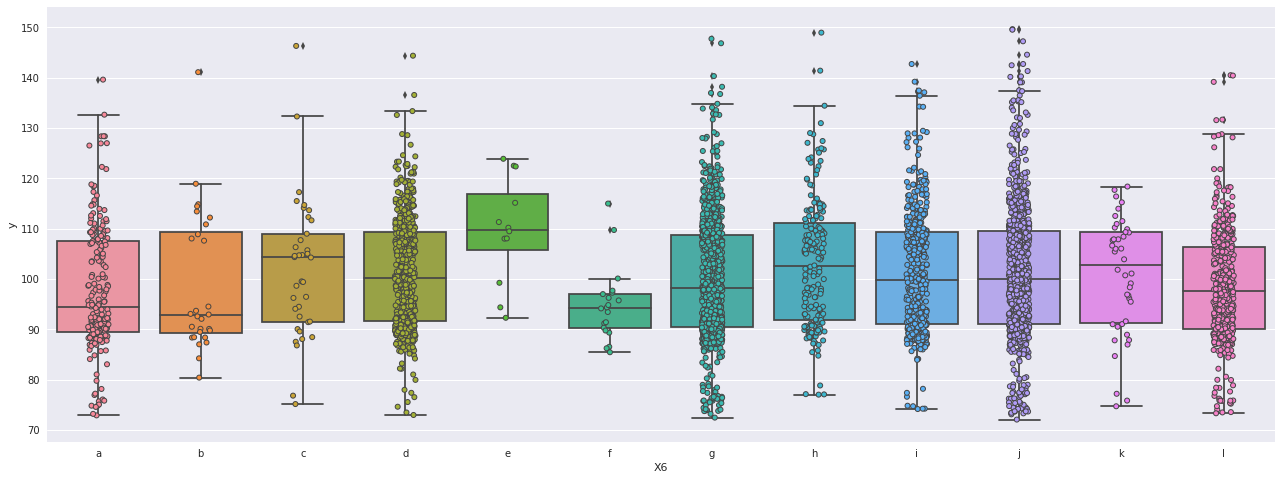

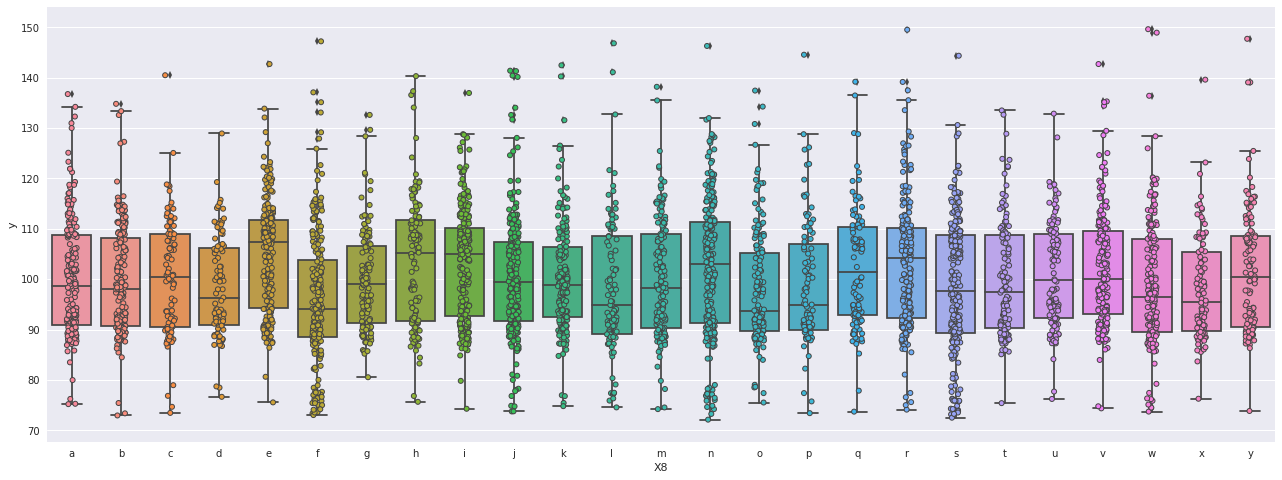

In [15]:
rcParams['figure.figsize'] = 22, 8
for i in df_cat.columns:
    if i not in 'y':
        plt.figure()
        plt.xlabel=i
        sns.stripplot(x=i, y="y", data=df,jitter=True, linewidth=1,order=np.sort(df[i].unique()))
        sns.boxplot(x=i, y="y", data=df, order=np.sort(df[i].unique()))
        plt.show()



In these stripplots with boxplots superimposed,  we find the following:

*     X0 and X2 have a large amount of diversity in their levels. Among those two, X0 shows the most obvious effect of grouping.

*     The lowest y values (i.e. shortest times) appear to be predominantly caused by 6 feature levels: X0:az, X0:bc, X1:y, X2:n, X5:h, X5:x. Together, these ones are a pretty good predictor for having low y.

*     Level X0:aa appears to have a notably higher average y than all other features, but consists only of two data points. This is very obvious with the jitter plots.

*     X3, X5, X6, X8 and to a certain extent X1 show distributions that are largely similar among the different levels


**Bivariate analysis using Cross-tabulation**

This also shows the gradient of change using colour change. As you can see as in X2 is the most popular category and leaving most of them with zero. Similarly it can be tested on any 2 more than two categories at the same time to check concurrent occurences of any pairs, triads, quadruplets , etc . . . . 

In [16]:
pd.crosstab([df_cat.X2], [df_cat.X0], margins=True).style.background_gradient(cmap='autumn_r')

## Further data cleaning . . .  


* Removing the features from the main dataframe that are involving zero variance or are having constant value inorder to remove redundancy and increase model performance later.
* Also checking the individual correlation of the features and getting some idea about individual feature importance.
* There are total 13 variables with zero variance , therefore they must be dropped.
* Checking for duplicate features in this large set.
* Feature selection multiple times .....

Removing columns with zero ovariance

In [17]:
temp = []
for i in df_num.columns:
    if df[i].var()==0:
        temp.append(i)
print(len(temp))
print(temp)

13
['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347']


Again setting a threshold of 0.01 for variance for each column and removing them too. The removed columns are also being removed from all the temporary dataframes.

In [18]:
count=0
low_var_col=[]
for i in test.columns:
    if test[i].dtype == 'int64':
        if test[i].var()<0.01:
            low_var_col.append(i)
            count+=1
print(count)

df.drop(low_var_col,axis=1,inplace=True)
df_num.drop(low_var_col,axis=1,inplace=True)
test.drop(low_var_col,axis=1,inplace=True)

146


Turn out to be there are 146 columns for removal purpose.


Updating the df_num dataframe after droping the features from original dataframe df.

In [19]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)

Getting the dictionary of important correlated features with target column y

## Some important feature correlations with the target variable.

** Taking 0.25 as threshold on grounds of experimental changes . . .**

In [20]:
dic={}
for i in df_num.columns:
    if i!='y':
        if df[i].corr(df.y)>0.25 or df[i].corr(df.y)<-0.25:
            dic[i]=df[i].corr(df.y)
print("Important Features with there respective correlations are ",'\n','---------------------------------------------------------','\n',dic)

Important Features with there respective correlations are  
 --------------------------------------------------------- 
 {'X28': -0.2615483878531125, 'X29': -0.39798467184249353, 'X54': -0.39362263688451005, 'X76': -0.39362263688451005, 'X80': -0.2566304628986175, 'X118': 0.29113400781216325, 'X119': 0.29113400781216325, 'X127': -0.5359508861669309, 'X136': 0.39362263688451005, 'X162': -0.380960152680421, 'X166': -0.3469061103890673, 'X178': -0.31054903426087876, 'X185': -0.25654857309239787, 'X232': -0.39798467184249353, 'X234': -0.2753088641090846, 'X250': -0.3231881489692971, 'X261': 0.6184684577479753, 'X263': 0.39798467184249364, 'X272': -0.3677994456153429, 'X275': 0.2929709300575139, 'X276': -0.37663134331800774, 'X279': -0.39798467184249353, 'X313': -0.34537856983725806, 'X314': 0.6371978536813555, 'X316': -0.2747484119054768, 'X328': -0.3839243197734772, 'X348': -0.2575483559803369, 'X378': -0.27115936517391365}


**This states that X29, X54, X76, X127, X136, X162, X166, X178,  X232,  X250,  X261, X263, X272,  X276, X279, X313, X314, X328  are important features later we will select using some selection techniques. **

**But ,  YOU MUST SEE THAT SOME FEATURES ARE HAVING SAME CORRELATIONS THAT COULD INDICATE THE POSSIBLE DUPLICATE FEATURES. Lets check them too . . **

In [21]:
print(df.X119.corr(df.X118),'\n', df.X29.corr(df.X54) ,'\n', df.X54.corr(df.X76) ,'\n', df.X263.corr(df.X279))

1.0 
 0.9971247031088817 
 1.0 
 -0.9999999999999999



This shows that are dataframe is containing some duplicate features which are having correlation of approx. 1. We will remove this redundancy also using some feature selection . .  .

**Duplicate features. **

In [22]:
# Dublicate features
d = {}; done = []
cols = df.columns.values
for c in cols: d[c]=[]
for i in range(len(cols)):
    if i not in done:
        for j in range(i+1, len(cols)):
            if all(df[cols[i]] == df[cols[j]]):
                done.append(j)
                d[cols[i]].append(cols[j])
dub_cols = []
for k in d.keys():
    if len(d[k]) > 0: 
        dub_cols += d[k]        
print('Dublicates:','\n', dub_cols)

Dublicates: 
 ['X232', 'X279', 'X35', 'X37', 'X113', 'X134', 'X147', 'X222', 'X76', 'X324', 'X84', 'X244', 'X119', 'X146', 'X226', 'X326', 'X360', 'X247']


Checking correlations among a set of duplicate features and preparing pairs who are highly correlated.

**Again, correlation threshold of 0.9 has been judged and taken after multiple experiments .....**

In [23]:
corrs=[]
high_corr=[]
for i in range(0,len(dub_cols)):
    for j in range(i+1,len(dub_cols)):
        if df[dub_cols[i]].corr(df[dub_cols[j]]) >=0.90:
            corrs.append(df[dub_cols[i]].corr(df[dub_cols[j]]))
            high_corr.append((dub_cols[i],dub_cols[j]))
print(corrs)
print("\n")
print(high_corr)

[0.9999999999999999, 0.9971247031088817, 0.9971247031088817, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


[('X232', 'X279'), ('X232', 'X76'), ('X279', 'X76'), ('X35', 'X37'), ('X113', 'X134'), ('X113', 'X147'), ('X113', 'X222'), ('X134', 'X147'), ('X134', 'X222'), ('X147', 'X222'), ('X84', 'X244'), ('X226', 'X326')]


In [24]:
df.drop(['X279','X76','X37','X134','X147','X222','X244','X326'] , axis=1 , inplace=True)

In [25]:
test.drop(['X279','X76','X37','X134','X147','X222','X244','X326'] , axis=1 , inplace=True)
df_num.drop(['X279','X76','X37','X134','X147','X222','X244','X326'] , axis=1 , inplace=True)

Label encoding the categorical features 

**This dataset has some real problem with the number of categories.**

There are different number of categories in train and test datset. Encountered

In [26]:
from sklearn import preprocessing
categorical=[]
for i in df.columns:
    if df[i].dtype=='object':
        le = preprocessing.LabelEncoder()
        le.fit(list(df[i].values) + list(test[i].values))
        print("Categories in the encoded order from 1 to the size of "+i+" are : ")
        print(le.classes_)
        print("--------------------------------------------------------------------------")
        df[i] = le.transform(list(df[i].values))
        test[i] = le.transform(list(test[i].values))
        categorical.append(i)

Categories in the encoded order from 1 to the size of X0 are : 
['a' 'aa' 'ab' 'ac' 'ad' 'ae' 'af' 'ag' 'ai' 'aj' 'ak' 'al' 'am' 'an' 'ao'
 'ap' 'aq' 'as' 'at' 'au' 'av' 'aw' 'ax' 'ay' 'az' 'b' 'ba' 'bb' 'bc' 'c'
 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u'
 'v' 'w' 'x' 'y' 'z']
--------------------------------------------------------------------------
Categories in the encoded order from 1 to the size of X1 are : 
['a' 'aa' 'ab' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p'
 'q' 'r' 's' 't' 'u' 'v' 'w' 'y' 'z']
--------------------------------------------------------------------------
Categories in the encoded order from 1 to the size of X2 are : 
['a' 'aa' 'ab' 'ac' 'ad' 'ae' 'af' 'ag' 'ah' 'ai' 'aj' 'ak' 'al' 'am' 'an'
 'ao' 'ap' 'aq' 'ar' 'as' 'at' 'au' 'av' 'aw' 'ax' 'ay' 'b' 'c' 'd' 'e'
 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'w' 'x'
 'y' 'z']
-----------------------------------------------------------------------

#### Now, finding correlations of each category with other . The increasing or decreasing class encoded value can be found from the categories written in the encoded order above.

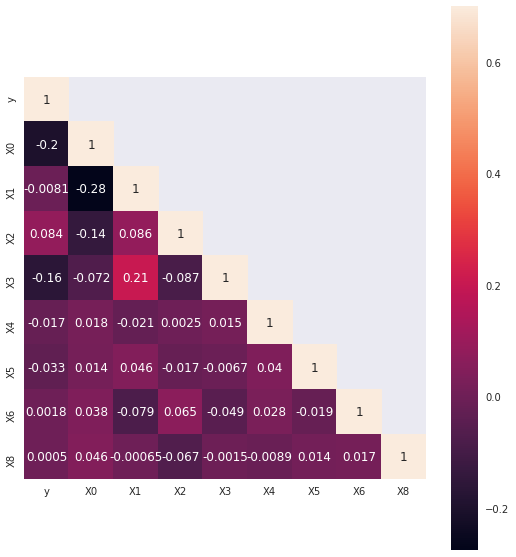

In [27]:
correlation_map = df[df.columns[1:10]].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,10)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)


**Preparing the data for feature importance**

Feature Importance by XGBoost


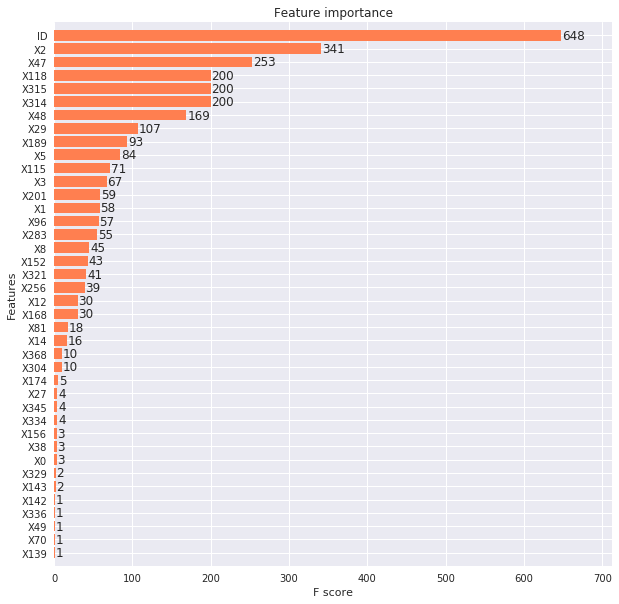

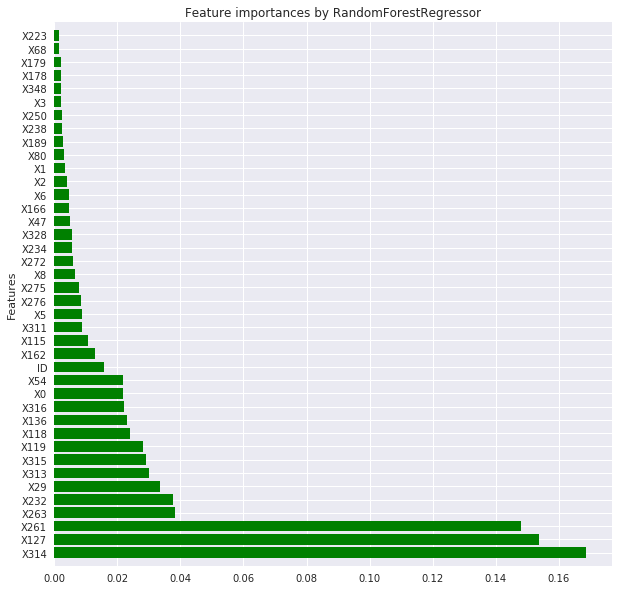

In [28]:
import xgboost as xgb
train_y = df["y"].values
train_X = df.drop(['y'], axis=1)

def xgb_r2_score(preds, final):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'n_trees': 520, 
    'eta': 0.0045,
    'max_depth': 4,
    'subsample': 0.98,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(train_y), # base prediction = mean(target)
    'silent': 1
}

final = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params), final, num_boost_round=200, feval=xgb_r2_score, maximize=True)

fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features=40, height=0.8, ax=ax, color = 'coral')
print("Feature Importance by XGBoost")
plt.show()

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)
feat_names = train_X.columns.values

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:40]

plt.subplots(figsize=(10,10))
plt.title("Feature importances by RandomForestRegressor")
plt.ylabel("Features")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), feat_names[indices], rotation='horizontal')
plt.ylim([-1, len(indices)])
plt.show()

**There seems a difference between the feature importances by the two models. You can check above, RandomForest is giving the feature importance more on the basis of the important correlations of target wrt numerical features that we have already figured out above.**

# Lets do some Feature Engineering . . .

* Following are some features that I have engineered after multiple trials  .
* These are just the results (the new features engineered) of the work that I have done for long.
* Since the features are anonymised, that makes pretty much difficult to do feature engineering.
* I have made some 2 way and 3 way interactions of the features which prove to be pretty much useful.
* Also there correlations are higher than their parent features which makes them even better.
* Feel free to write new features engineered by yourself in the comment section below.

<img src="https://media.giphy.com/media/fQoCOuFL7DlR6zYRnw/giphy.gif" />

Taking X314 and X315

In [29]:
df['X314_plus_X315'] = df.apply(lambda row: row.X314 + row.X315, axis=1)
test['X314_plus_X315'] = test.apply(lambda row: row.X314 + row.X315, axis=1)

In [30]:
print("Correalation between X314_plus_X315 and y is :  ",df.y.corr(df['X314_plus_X315']))
print("Which makes it pretty much high !! Awesome !!")

Correalation between X314_plus_X315 and y is :   0.6990819224017307
Which makes it pretty much high !! Awesome !!


Taking X122 and X128

In [31]:
#df['X122_plus_X128'] = df.apply(lambda row: row.X122 + row.X128, axis=1)
#test['X122_plus_X128'] = test.apply(lambda row: row.X122 + row.X128, axis=1)

In [32]:
#print("Correlation between X122_plus_X128 and y is :  ",df.y.corr(df['X122_plus_X128']))

Taking X118 , X314 and X315

In [33]:
df['X118_plus_X314_plus_X315'] = df.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)
test['X118_plus_X314_plus_X315'] = test.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)

In [34]:
print("Correalation between X118_plus_X314_plus_X315 and y is :  ",df.y.corr(df['X118_plus_X314_plus_X315']))
print("Which makes it pretty much high !! Awesome !!")

Correalation between X118_plus_X314_plus_X315 and y is :   0.6837266223799761
Which makes it pretty much high !! Awesome !!


Taking X10 and X54

In [35]:
df["X10_plus_X54"] = df.apply(lambda row: row.X10 + row.X54, axis=1)
test["X10_plus_X54"] = test.apply(lambda row: row.X10 + row.X54, axis=1)
print("Correalation between X10_plus_X54 and y is :  ",df.y.corr(df['X10_plus_X54']))

Correalation between X10_plus_X54 and y is :   -0.35971380234785816


Taking X10 and X29

In [36]:
df["X10_plus_X29"] = df.apply(lambda row: row.X10 + row.X29, axis=1)
test["X10_plus_X29"] = test.apply(lambda row: row.X10 + row.X29, axis=1)
print("Correalation between X10_plus_X29 and y is :  ",df.y.corr(df['X10_plus_X29']))

Correalation between X10_plus_X29 and y is :   -0.36335288700846


Updating the dataframe for feature importance , the one we used above.

In [37]:
train_X['X314_plus_X315']=df['X314_plus_X315']
#train_X['X122_plus_X128']=df['X122_plus_X128']
train_X['X118_plus_X314_plus_X315']=df['X118_plus_X314_plus_X315']
train_X["X10_plus_X54"] = df["X10_plus_X54"]
train_X["X10_plus_X29"] = df["X10_plus_X29"]

* Taking the numeric dataframe df_num and finding all the features with very high correlation an dchecking for them. Also making the pairs of them as above.
* Turns out to be a list of 63 features again that are highly correlated. 
**Again, the value of 0.95 has been experimentally judged and taken , there is no thumb rule to take the threshold value.**

In [38]:
corr_val=[]
same_features=[]
for i in range(0,len(df_num.columns)-1):
    for j in range(i+1,len(df_num.columns)):
        temp_corr=df[df_num.columns[i]].corr(df[df_num.columns[j]])
        if temp_corr>=0.95 or temp_corr<=-0.95: 
            same_features.append((df_num.columns[i],df_num.columns[j]))
            corr_val.append(temp_corr)
print(len(corr_val))
print(same_features)

63
[('X19', 'X215'), ('X29', 'X54'), ('X29', 'X136'), ('X29', 'X162'), ('X29', 'X232'), ('X29', 'X263'), ('X29', 'X328'), ('X31', 'X35'), ('X48', 'X113'), ('X48', 'X198'), ('X49', 'X129'), ('X52', 'X61'), ('X52', 'X120'), ('X54', 'X136'), ('X54', 'X162'), ('X54', 'X232'), ('X54', 'X263'), ('X54', 'X328'), ('X58', 'X137'), ('X58', 'X324'), ('X61', 'X120'), ('X66', 'X111'), ('X71', 'X84'), ('X80', 'X348'), ('X96', 'X363'), ('X108', 'X371'), ('X113', 'X198'), ('X118', 'X119'), ('X118', 'X311'), ('X119', 'X311'), ('X126', 'X264'), ('X128', 'X130'), ('X136', 'X162'), ('X136', 'X232'), ('X136', 'X263'), ('X136', 'X328'), ('X137', 'X324'), ('X138', 'X140'), ('X138', 'X146'), ('X140', 'X146'), ('X142', 'X158'), ('X152', 'X226'), ('X155', 'X360'), ('X156', 'X157'), ('X162', 'X232'), ('X162', 'X263'), ('X162', 'X328'), ('X178', 'X250'), ('X185', 'X378'), ('X186', 'X194'), ('X186', 'X362'), ('X194', 'X362'), ('X202', 'X247'), ('X208', 'X368'), ('X228', 'X229'), ('X232', 'X263'), ('X232', 'X328'),

In [39]:
booler = np.ones(400)
for i in same_features:
    if booler[int(i[1][1:])]==1:
        booler[int(i[1][1:])]=0
        df_num.drop(i[1],axis=1,inplace=True)
        df.drop(i[1],axis=1,inplace=True)
        test.drop(i[1],axis=1,inplace=True)
        train_X.drop(i[1],axis=1,inplace=True)
    elif booler[int(i[0][1:])]==1:
        booler[int(i[0][1:])]=0
        df_num.drop(i[0],axis=1,inplace=True)
        df.drop(i[0],axis=1,inplace=True)
        test.drop(i[0],axis=1,inplace=True)
        train_X.drop(i[0],axis=1,inplace=True)

**STEPS for removing above redundancy . . .**

* Booler is the array of 1 and 0 for keeping the track of the features that we have dropped from the multiple dataframes and allowing the execution of cell without off any error of column not found. (Also the features are being repeated in multiple pairs.) 
* Initially the booler is taken as all of 1,  considering the fact that all features are present in the dataframe and later we would make them zeroes one by one. 
* The steps are like , we will target the 2nd feature of each pair and check for its existence, if its present then remove it or else if check for the 1st feature in the pair , and if this also is not present then simply skip that particular pair of feature. 
* The booler would be used to check the existence of that features in dataframes.

This dataset is very dirty !! Believe it ....We have to clean it to the utmost level we can to feed into our model to achieve the high accuracy that we aspire.

## That look great the new features engineered have outperformed the existing features in the data in the RandomForrest feature importance plot.

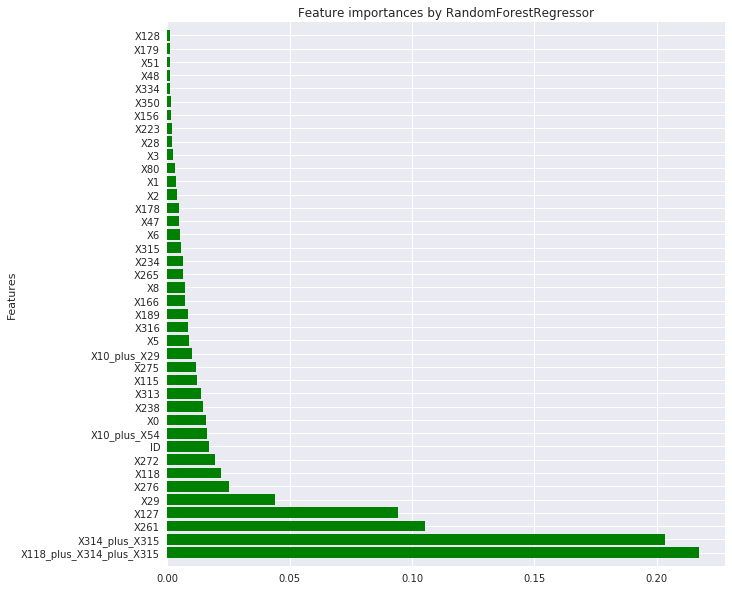

Feature Importance by XGBoost


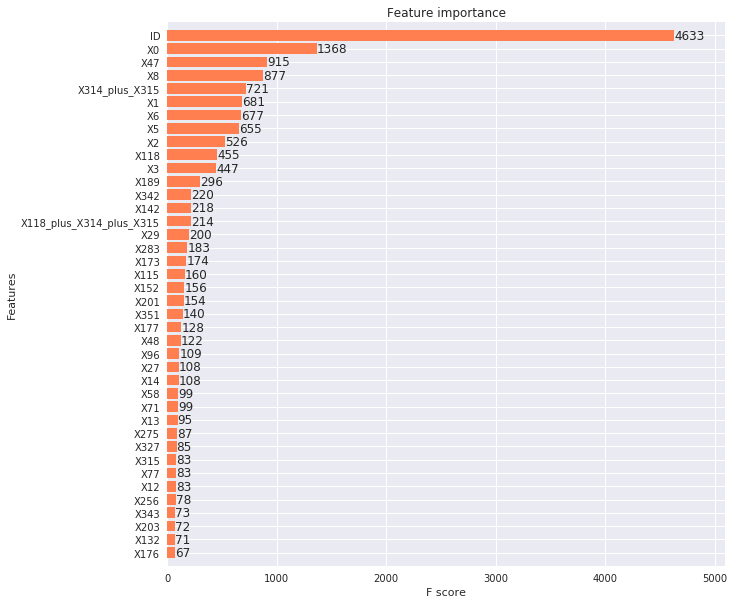

In [40]:
model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)
feature_names = train_X.columns.values

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:40]

plt.subplots(figsize=(10,10))
plt.title("Feature importances by RandomForestRegressor")
plt.ylabel("Features")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal')
plt.ylim([-1, len(indices)])
plt.show()

final = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params), final, num_boost_round=1350, feval=xgb_r2_score, maximize=True)

fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features=40, height=0.8, ax=ax,color = 'coral')
print("Feature Importance by XGBoost")
plt.show()

Though in XGboost they have earned a little less position but still higher enough to be considered as good work for model performance.

Taking a total of 378 feature count to 185...

In [41]:
print(train_X.shape , test.shape)

(4194, 185) (4209, 185)


In [42]:
list(set(train_X.columns)-set(test.columns))

[]

### Below is the code for one hot encoding and creating a sparse matrix of around 211 features. But commented it out because it gave me degraded performance. Don't know why ....if anybody knows the answer than please comment it below... I would love to listen.

In [43]:
'''from sklearn.preprocessing import OneHotEncoder
total_hot=np.concatenate( (train_X.values[:,1:9], test.values[:,1:9]), axis=0)
enc = OneHotEncoder()
enc.fit(total_hot)
total_hot=enc.transform(total_hot)'''

'from sklearn.preprocessing import OneHotEncoder\ntotal_hot=np.concatenate( (train_X.values[:,1:9], test.values[:,1:9]), axis=0)\nenc = OneHotEncoder()\nenc.fit(total_hot)\ntotal_hot=enc.transform(total_hot)'

Making a dense matrix from sparse

In [44]:
'''total_hot.todense().shape'''

'total_hot.todense().shape'

Appending the encoded categories to ID vector and then appending the rest dataframe of numerical features to this newly formed dataframe. Similarly doing this to test matrix.

In [45]:
'''train_hot=total_hot.todense()[:4194,:]
test_hot=total_hot.todense()[4194:8404,:]
print(train_hot.shape)
train_X_hot=np.concatenate( (train_X.values[:,0].reshape(4194,1),train_hot) , axis=1)
test_hot=np.concatenate( (test.values[:,0].reshape(4209,1),test_hot) , axis=1)
train_X_hot=np.concatenate( (train_X_hot,train_X.values[:,9:]) , axis=1)
test_hot=np.concatenate( (test_hot,test.values[:,9:]) , axis=1)'''

'train_hot=total_hot.todense()[:4194,:]\ntest_hot=total_hot.todense()[4194:8404,:]\nprint(train_hot.shape)\ntrain_X_hot=np.concatenate( (train_X.values[:,0].reshape(4194,1),train_hot) , axis=1)\ntest_hot=np.concatenate( (test.values[:,0].reshape(4209,1),test_hot) , axis=1)\ntrain_X_hot=np.concatenate( (train_X_hot,train_X.values[:,9:]) , axis=1)\ntest_hot=np.concatenate( (test_hot,test.values[:,9:]) , axis=1)'

In [46]:
'''print(train_X_hot.shape, test_hot.shape)'''

'print(train_X_hot.shape, test_hot.shape)'

Later tried to append the PCA , SVD ,sparse random projections to the dataframe but still got degraded model performance...Please do tell me if anybody knows the answer for this....

Using 12 as components so as to still retain a variance of ~98%.

In [47]:
'''from sklearn.decomposition import PCA
pca=PCA(n_components=6 , random_state=7)
pca.fit(train_X_hot)
pca_train_X = pca.transform(train_X_hot)
pca_test = pca.transform(test_hot)

print(pca.explained_variance_ratio_.sum())
print("--------------------------------------------------------------")
print(pca.components_)
print("--------------------------------------------------------------")
print(pca.components_.shape)
print("--------------------------------------------------------------")
print(pca_train_X.shape , pca_test.shape)
'''

'from sklearn.decomposition import PCA\npca=PCA(n_components=6 , random_state=7)\npca.fit(train_X_hot)\npca_train_X = pca.transform(train_X_hot)\npca_test = pca.transform(test_hot)\n\nprint(pca.explained_variance_ratio_.sum())\nprint("--------------------------------------------------------------")\nprint(pca.components_)\nprint("--------------------------------------------------------------")\nprint(pca.components_.shape)\nprint("--------------------------------------------------------------")\nprint(pca_train_X.shape , pca_test.shape)\n'

Validating our XGboost...Finding the best hyperparameters.

### Till here I was in 20 % on private leaderboard but after hyperparameter tuning I landed in top 2% .

In [48]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_X, train_y, test_size=0.2, random_state=420)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(test)

xgb_params = {
    'n_trees': 500, 
    'eta': 0.0050,
    'max_depth': 3,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(train_y), # base prediction = mean(target)
    'silent': 1
}

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(xgb_params, d_train, 1050 , watchlist, early_stopping_rounds=70, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[0]	train-rmse:11.9877	valid-rmse:11.8271	train-r2:0.006224	valid-r2:0.005964
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 70 rounds.
[10]	train-rmse:11.6256	valid-rmse:11.4666	train-r2:0.065361	valid-r2:0.065634
[20]	train-rmse:11.2882	valid-rmse:11.1312	train-r2:0.118827	valid-r2:0.119486
[30]	train-rmse:10.9726	valid-rmse:10.8175	train-r2:0.167398	valid-r2:0.168424
[40]	train-rmse:10.6793	valid-rmse:10.5267	train-r2:0.211321	valid-r2:0.212533
[50]	train-rmse:10.4066	valid-rmse:10.2564	train-r2:0.251087	valid-r2:0.252449
[60]	train-rmse:10.1537	valid-rmse:10.0061	train-r2:0.287042	valid-r2:0.288498
[70]	train-rmse:9.91887	valid-rmse:9.77395	train-r2:0.319639	valid-r2:0.321127
[80]	train-rmse:9.70151	valid-rmse:9.5593	train-r2:0.349132	valid-r2:0.350618
[90]	train-rmse:9.49997	valid-rmse:9.36101	train-r2:0.375893	valid-r2:0.377279
[100]	train-rmse:9.31385	valid-rmse:9.17796	train-r2:0.400107	valid-r2:

[1020]	train-rmse:7.03181	valid-rmse:7.18771	train-r2:0.658061	valid-r2:0.632862
[1030]	train-rmse:7.02753	valid-rmse:7.1873	train-r2:0.658477	valid-r2:0.632904
[1040]	train-rmse:7.02465	valid-rmse:7.18704	train-r2:0.658757	valid-r2:0.632931
[1049]	train-rmse:7.02095	valid-rmse:7.18748	train-r2:0.659116	valid-r2:0.632885


Now, training the whole dataset on selected parameters so as to avoid any data loss.

In [49]:
d_train = xgb.DMatrix(train_X, label=train_y)
#d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(test)

xgb_params = {
    'n_trees': 500, 
    'eta': 0.0050,
    'max_depth': 3,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(train_y), 
    'silent': 1
}

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train')]

clf = xgb.train(xgb_params, d_train, 1050 , watchlist, early_stopping_rounds=70, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[0]	train-rmse:11.956	train-r2:0.006222
Multiple eval metrics have been passed: 'train-r2' will be used for early stopping.

Will train until train-r2 hasn't improved in 70 rounds.
[10]	train-rmse:11.5944	train-r2:0.065424
[20]	train-rmse:11.257	train-r2:0.119021
[30]	train-rmse:10.9424	train-r2:0.167571
[40]	train-rmse:10.65	train-r2:0.211471
[50]	train-rmse:10.3786	train-r2:0.25114
[60]	train-rmse:10.1265	train-r2:0.28708
[70]	train-rmse:9.89281	train-r2:0.319606
[80]	train-rmse:9.67586	train-r2:0.349121
[90]	train-rmse:9.47515	train-r2:0.375844
[100]	train-rmse:9.28969	train-r2:0.400039
[110]	train-rmse:9.1184	train-r2:0.42196
[120]	train-rmse:8.96017	train-r2:0.441846
[130]	train-rmse:8.81481	train-r2:0.459809
[140]	train-rmse:8.68083	train-r2:0.476107
[150]	train-rmse:8.5575	train-r2:0.490886
[160]	train-rmse:8.44421	train-r2:0.504278
[170]	train-rmse:8.34055	train-r2:0.516374
[180]	train-rmse:8.24499	train-r2:0.527392
[190]	train-rmse:8.15727	train-r2:0.537395
[200]	train-rmse:8.

## Making the submission file ...Check yourself for the authentication of script claiming 78th place on private leaderboard with a score of 0.55282 which is Top 2 %. 

## Check for output tab of the notebook and check the score after submitting it . . . 

In [50]:
Answer = clf.predict(d_test)

sub = pd.DataFrame()
sub['ID'] = test.ID
sub['y'] = Answer
sub.to_csv('mercedes_benz_The_best_or_Nothing.csv', index=False)

In [51]:
sub.head()

,ID,y
0,1,85.353653
1,2,108.338951
2,3,80.733643
3,4,79.036476
4,5,114.450714


## Please upvote if you like . . . 